# Import fonctions

In [1]:
from fonctions_modelisation_avancee import *

/home/romain/work/projet7/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
E0000 00:00:1750885731.893242    9640 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750885731.899485    9640 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750885731.916256    9640 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750885731.916292    9640 computation_placer.cc:177] computation placer already registered. Please c

# Import des données

In [2]:
import pandas as pd

# Définition des noms de colonnes
columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Chargement des données
data = pd.read_csv(
    '/home/romain/work/projet7/notebooks/data/sentiment140/training.1600000.processed.noemoticon.csv',
    encoding='latin-1',
    header=None,
    names=columns,
    quotechar='"',
    quoting=1 
)

# Extraction échantillon de 1000 tweets pour travailler sur un petit ensemble car machine peu puissante

In [3]:
data_sample_1000 = data.sample(n=1000, random_state=42)

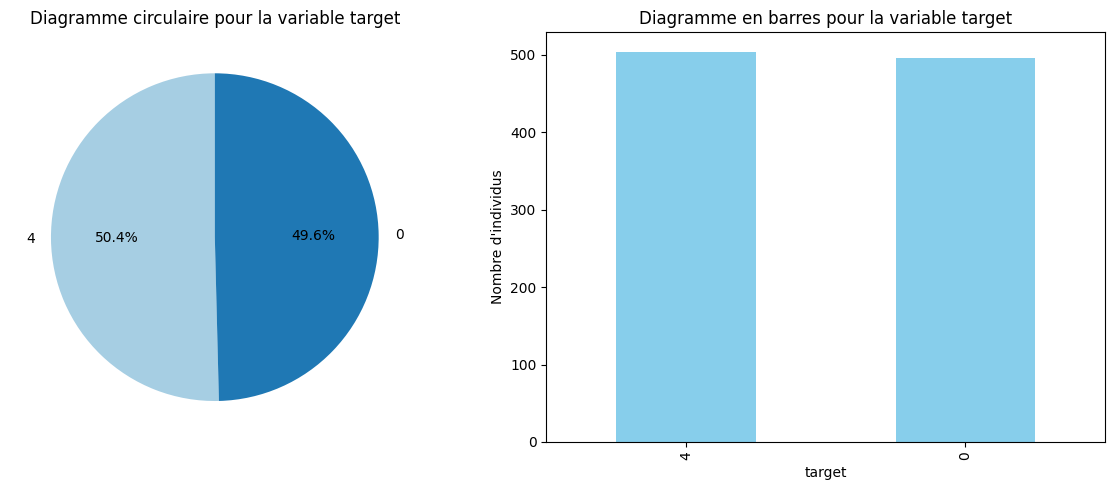

In [4]:
tracer_pie_bar(data_sample_1000, ['target'])

In [3]:
data_sample_1000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 541200 to 385755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1000 non-null   int64 
 1   id      1000 non-null   int64 
 2   date    1000 non-null   object
 3   flag    1000 non-null   object
 4   user    1000 non-null   object
 5   text    1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 54.7+ KB


# Démarrage d'un serveur MLFLOW local

# Entrainement Embeddings GLOVE et WORD2VEC dans une instance MLFLOW locale

In [10]:
model, embeddings = train_with_reduced_word2vec(
    df=data_sample_1000,
    text_col="text",
    target_col="target",
    mlflow_experiment_name="Word2Vec_Reduced_v0",
    embedding_path="reduced_word2vec.model",
    num_epochs=10,
    batch_size=32,
    lr=0.001
)

Embedding training texts...
Embedding test texts...
Starting training...
Epoch 1/10 - Loss: 0.6801
Epoch 2/10 - Loss: 0.6861
Epoch 3/10 - Loss: 0.6910
Epoch 4/10 - Loss: 0.6908
Epoch 5/10 - Loss: 0.6898
Epoch 6/10 - Loss: 0.6924
Epoch 7/10 - Loss: 0.6895
Epoch 8/10 - Loss: 0.6889
Epoch 9/10 - Loss: 0.6914
Epoch 10/10 - Loss: 0.6904
Test Accuracy: 0.5850


/home/romain/work/projet7/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/06/25 23:14:10 INFO mlflow.pyfunc: Validating input example against model signature


MLflow Run ID: 3465ef879c1e42c8b7219cc4d29bd899
Début de l'enregistrement du modèle dans MLflow...


Registered model 'reduced_w2v_classifier' already exists. Creating a new version of this model...
2025/06/25 23:16:15 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: reduced_w2v_classifier, version 2
Created version '2' of model 'reduced_w2v_classifier'.
/tmp/ipykernel_9640/4079975433.py:218: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_version = client.get_latest_versions("reduced_w2v_classifier", stages=["None"])[0]


Modèle enregistré avec succès. Version 2
Run 3465ef879c1e42c8b7219cc4d29bd899 complété avec succès
🏃 View run suave-lamb-885 at: http://127.0.0.1:8080/#/experiments/790005665595594028/runs/3465ef879c1e42c8b7219cc4d29bd899
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/790005665595594028


In [12]:
model, embeddings_index = train_text_classifier_with_mlflow(data_sample_1000,
                                                  embedding_path="glove.6B.300d.txt",
                                                  text_col="text",
                                                  target_col="target",
                                                  mlflow_experiment_name="GLOVE_tweet_sentiment_classification_v1"
                                                  )

/home/romain/work/projet7/notebooks/pipeline/Classificateur-de-tweet-selon-le-sentiment-positif-ou-negatif/notebooks/fonctions_modelisation_avancee.py:101: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_train_embed = torch.tensor([embed_text(t, embeddings_index, embedding_dim) for t in X_train], dtype=torch.float32)


Epoch 1/10 done.
Epoch 2/10 done.
Epoch 3/10 done.
Epoch 4/10 done.
Epoch 5/10 done.
Epoch 6/10 done.
Epoch 7/10 done.
Epoch 8/10 done.
Epoch 9/10 done.
Epoch 10/10 done.
Test Accuracy: 0.7250


/home/romain/work/projet7/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/06/25 23:19:24 INFO mlflow.pyfunc: Validating input example against model signature


📦 Logging model with text input...


Registered model 'glove_tweet_classifier' already exists. Creating a new version of this model...
2025/06/25 23:20:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: glove_tweet_classifier, version 3


🏃 View run mercurial-finch-671 at: http://127.0.0.1:8080/#/experiments/803528010049137753/runs/ad69e7ed061c4a9987ad0e039c00775f
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/803528010049137753


Created version '3' of model 'glove_tweet_classifier'.


# Entrainement BERT dans une instance MLFLOW locale

In [4]:
model, scores = train_bert_classifier_with_mlflow(data_sample_1000,
                                                  text_col="text",
                                                  target_col="target",
                                                  mlflow_experiment_name="BERT_tweet_sentiment_classification_v1")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025/06/10 23:08:20 INFO mlflow.tracking.fluent: Experiment with name 'BERT_tweet_sentiment_classification_v1' does not exist. Creating a new experiment.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025/06/10 23:27:01 INFO mlflow.pyfunc: Validating input example against model signature


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Successfully registered model 'bert_tweet_classifier'.
2025/06/10 23:28:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: bert_tweet_classifier, version 1
Created version '1' of model 'bert_tweet_classifier'.


✅ Fine-tuning terminé — Accuracy: 0.8500 | F1-score: 0.8558
🏃 View run judicious-crane-680 at: http://127.0.0.1:8080/#/experiments/164010987297847377/runs/b7c91151bed94914af921d85ec1e04c0
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/164010987297847377


# Model serving

# CLI dans l'environnement python

In [ ]:
export MLFLOW_TRACKING_URI=http://127.0.0.1:8080
export PYTHONPATH=$PYTHONPATH:/home/romain/work/projet7/notebooks
mlflow models serve -m "models:/bert_tweet_classifier/6" -p 5001 --no-conda

# Call API CLI

# Call API  Python

In [13]:
import requests

url = "http://127.0.0.1:5001/invocations"
headers = {"Content-Type": "application/json"}

data = {
    "dataframe_split": {
        "columns": ["text"],
        "data": [
            ["I love this tweet!"],
            ["This is terrible."],
            ["This is awesome."],
            ["This is bad."]
        ]
    }
}

response = requests.post(url, json=data, headers=headers)

print("Prediction:", response.json())

Prediction: {'predictions': [{'tweet': 'I love this tweet!', 'prediction': 4, 'confidence': 0.5245030522346497}, {'tweet': 'This is terrible.', 'prediction': 0, 'confidence': 0.5110159516334534}, {'tweet': 'This is awesome.', 'prediction': 4, 'confidence': 0.6796095371246338}, {'tweet': 'This is bad.', 'prediction': 0, 'confidence': 0.518050491809845}]}
